# Definir el problema
## Reconocer el tipo de aprendizaje que necesitas
1. Que beneficio piensas generar y para quien?
2. Cual de las siguientes funcionalidaes te seria util para lograr ese objetivo:
  A. Predecir alguna metrica (Aprendizaje supervisado)

  B. Predecir una etiqueta (Aprendizaje supervisado)

  C. Agrupar elementos similares
  
  D. Optimizar un proceso con prueba y error.

## Aterriza tu problema de aprendizaje supervisado
1. Lo que quieres predecir es un valor de que tipo?

  A. Continuo

  B. Discreto

2. Cual es tu definicion de exito de una prediccion?
3. Con que datos contarias para hacer esta prediccion?
4. La pregunta que estas tratando de resolver pertenece a alguna disciplina en particular?
5. Considerando tu intuicion en la disciplina, crees que los datos te permitan predecir tu objetivo?

**Video bueno:** https://www.youtube.com/watch?v=_OcLeySukXA&feature=youtu.be


**Documentacion Skitlearn** https://scikit-learn.org/stable/ 


# Terminologia de Machine Learning
* **Datos tabulares** = Datos en dos dimensiones.
* **Líneas** = Ejemplos
* **Columna** = Feauture. Éstas son importantes porque nos van a ayudar a predecir cosas gracias a los modelos que usemos de Machine Learning.
* **Cantidad de columnas** = Dimensión de los datos
* **Output de un algoritmo de Machine Learning (ML)** = Modelo
Variable objetivo = Target

# El ciclo de Machine Learning

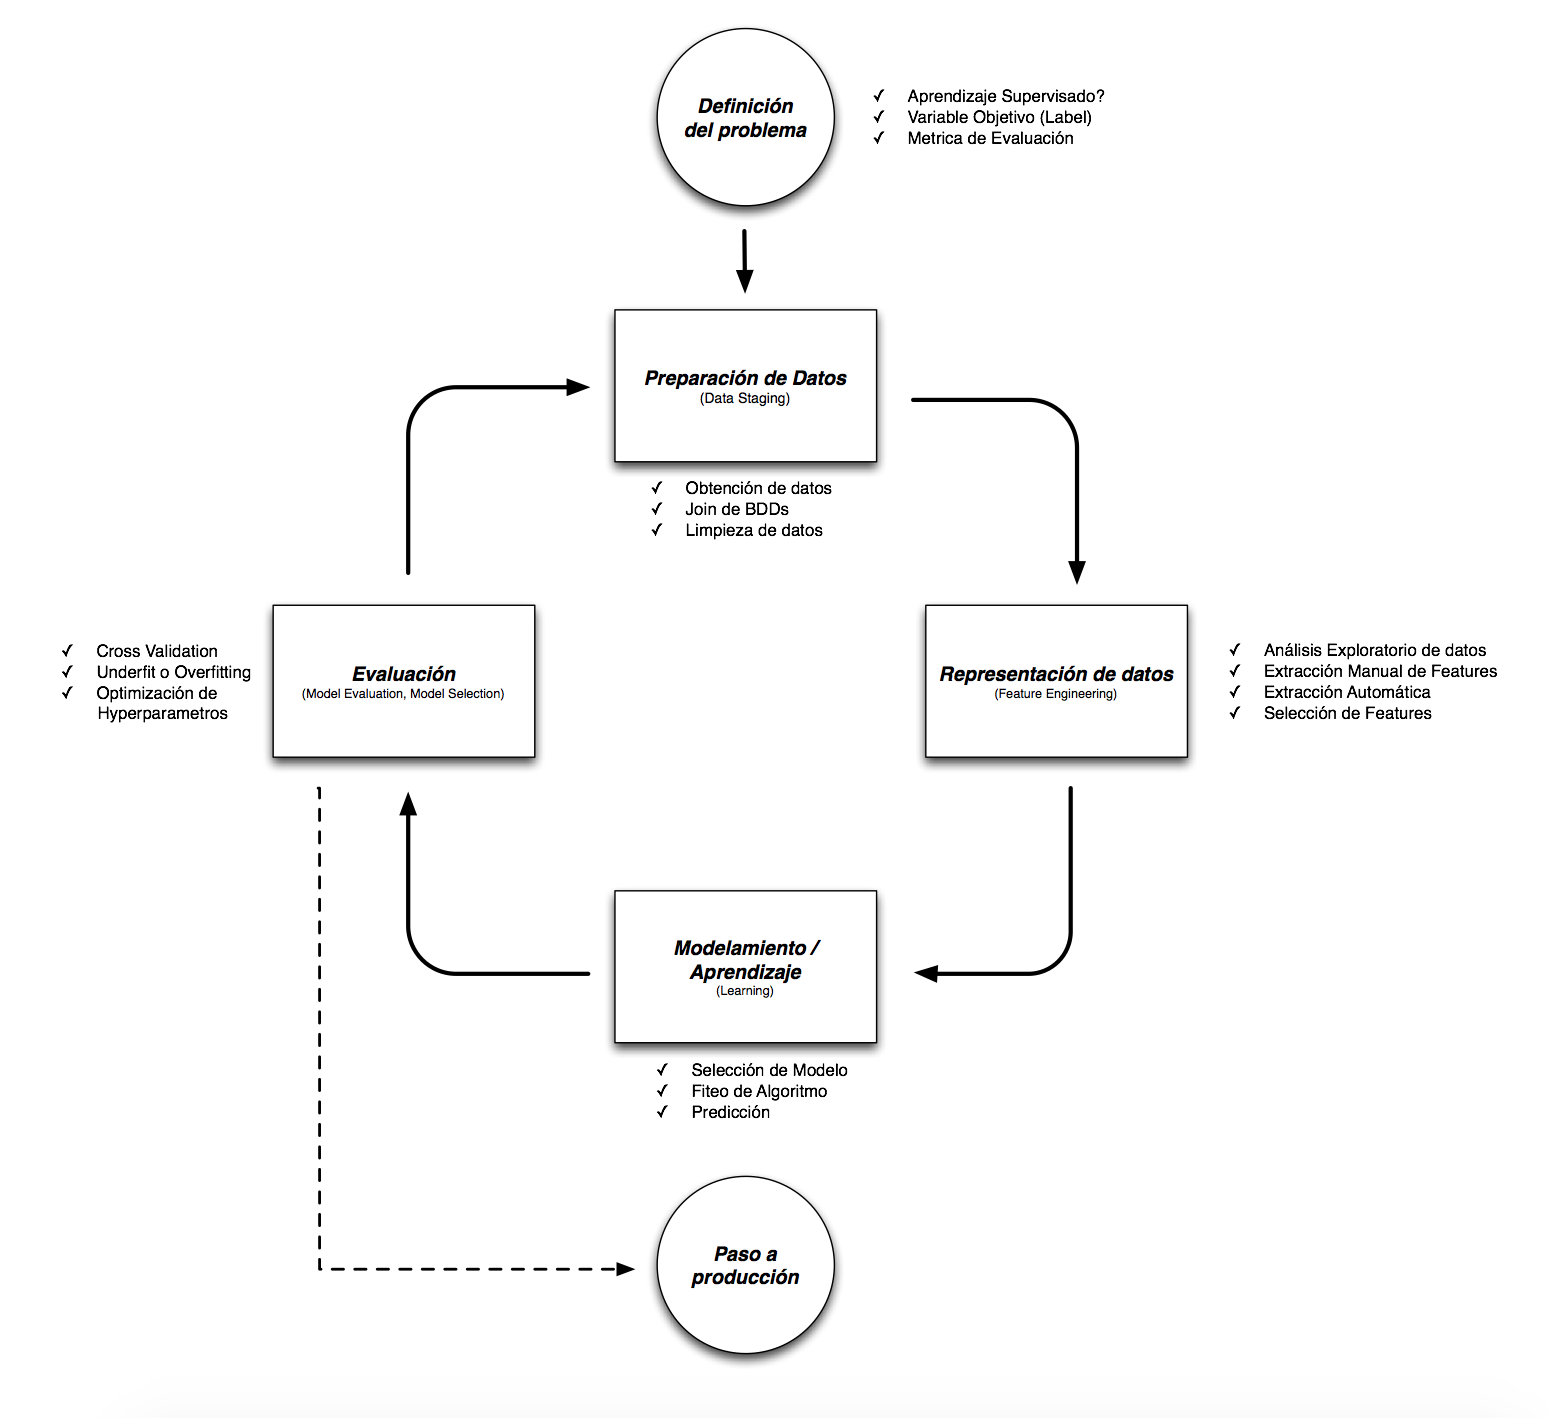
1. Definicion del problema
2. Preparacion de datos
3. Representacion de datos
4. Modelamiento
5. Evaluacion5
6. Paso a produccion

**Nota:** Del paso 2 al 5 es iterativo hasta obtener un resultado que llene las expectativas. En las primeras iteraciones se busca hacer lo mas simple que esta apegado con el dicho de:La navaja de Ockham o Principio de Parsimonia: La solución más simple casi siempre es la mejor.

# Numpy
* **Numpy** es una librería muy importante para el ecosistema de Python ya que es la base de todos los cálculos científicos y muchas de las librerías de Machine Learning.
* Scikit-Learn con sus modelos, cuando retorna un resultado, en general lo retorna en un formato Numpy.
* La API de Numpy tiene muchas similitudes con Pandas.
* Numpy reemplaza de forma más eficiente lo que podría ser un tipo lista. En las listas podemos tener conjuntos de elementos numéricos. Sin embargo las listas no logran manejar datos de dos dimensiones.
* Las listas no poseen métodos que son prácticos para hacer aritmética.
* **np.linspace(a, b, n)** es una función que permite crear un array de una dimensión de números entre a y b, distanciados de forma regular. La distancia entre cada punto sera de (b-a)(n-1).
* Los array a diferencia de otros objetos en Python están fuertemente tipificados. Esta tipificación fuerte es necesaria porque es una de las cosas que permite que esta librería sea más rápida que ocupar listas, por ejemplo.
* Numpy utiliza **UFUNC** que son funciones que corren a la velocidad de codigo compilado en C. Por lo general un codigo Numpy solo con funciones nativas, sin bucles se le llama **Codigo Vectorizado**.

**Slide de conferencia de numpy y otra librerias** https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019/blob/master/slides.pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
movies = pd.read_csv('https://github.com/JuanPabloMF/datasets-platzi-course/blob/master/datasets/peliculas.csv?raw=true', encoding='utf-8')
movies.head(5)

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [3]:
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [4]:
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [5]:
linea = movies.loc[1,:]
linea

movie_title                          Pirates of the Caribbean: At World's End 
title_year                                                                2007
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   169
language                                                               English
country                                                                    USA
duration.1                                                                 169
genres                                                Action|Adventure|Fantasy
content_rating                                                           PG-13
plot_keywords                goddess|marriage ceremony|marriage proposal|pi...
director_name                                                   Gore Verbinski
actor_1_name                                        

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [7]:
# Separar columnas de texto y columnas numericas
num = (movies.dtypes == float) | (movies.dtypes == int)
nums_cols = [i for i in num.index if num[i]]

In [8]:
obj = movies.dtypes == object
objs_cols = [i for i in obj.index if obj[i]]

# Inspeccion cuantitativa y de salud de los datos

In [9]:
movies_num = movies[nums_cols]
movies_num.head(5)

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN


In [10]:
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


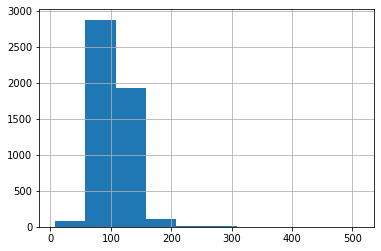

In [11]:
movies_num['duration'].hist() # Distribucion gausiana normal

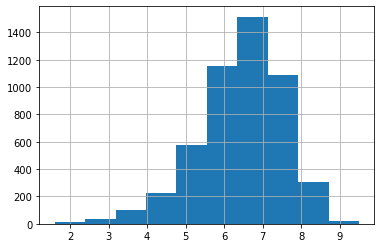

In [12]:
movies_num['imdb_score'].hist() # Distribucion gausiana normal

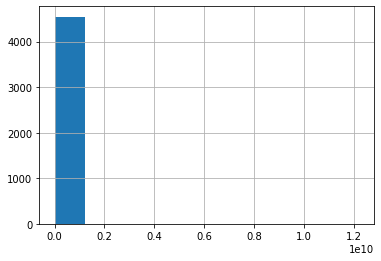

In [13]:
movies_num['budget'].hist() # Distribucion de los datos anormal, es decir no hay sanidad en los datos

In [14]:
(movies_num['budget'] > 1e9).value_counts() # Peliculas mayores a un billon

False    5037
True        6
Name: budget, dtype: int64

In [15]:
mask = movies_num['budget'] > 1e9
movies[mask] # Obteniendo las peliculas que superan el billon (Al ver los datos se miran que son peliculas chinas cuyo valor es mayor a un billon)
# Pero la moneda esta en Yenes es decir en la columna badget no solo hay dolares.

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


# Limpieza de datos

(4341, 3)

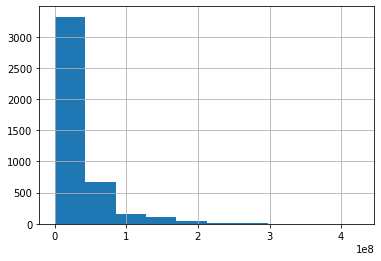

In [16]:
# Recuperando datos de un CSV que contiene los datos monetarios correctos
financials = pd.read_csv('https://github.com/JuanPabloMF/datasets-platzi-course/blob/master/datasets/thenumbers.csv?raw=true', encoding='utf-8')
financials = financials[['movie_title', 'production_budget', 'worldwide_gross']]
financials['production_budget'].hist()
financials.shape # Se perderan datos, pero vale mas tener datos limpios que sucios

In [17]:
# Agregaremos la columna movie_title al dataframe que solo contiene valores numericos, ya que esta sera usada como llava de JOIN
movies_num = pd.concat([movies_num, movies['movie_title']], axis=1)
movies_num.shape

(5043, 9)

In [18]:
# Haciendo merge con tabla financials para tener datos correctos en el budget
movies_v2 = pd.merge(financials, movies_num, on='movie_title', how='left')
movies_v2.shape

(4385, 11)

In [19]:
movies_v2.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0


# Manejo de datos faltantes

In [20]:
movies_v2.notnull().apply(pd.Series.value_counts) # La funcion apply es como un for loop, por cada columna verifica la cantidad de FALSE Y TRUE

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [21]:
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [22]:
available = ((movies_v2 !=0) & (movies_v2.notnull()))
available.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

In [23]:
mask = available['worldwide_gross']
movies_v2 = movies_v2[mask]

In [24]:
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts() # La variable objetivo ya esta limpia

True    4104
Name: worldwide_gross, dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [26]:
movies_v2 = movies_v2.drop('movie_title', axis=1)

In [27]:
movies_v2 = movies_v2.drop('duration', axis=1)

In [28]:
values = imputer.fit_transform(movies_v2)
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        4.04553863e+07, 7.10000000e+00, 4.83193329e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.83193329e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        4.04553863e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [49]:
x = pd.DataFrame(values)
x.columns = movies_v2.columns
x.index = movies_v2.index
x.to_csv('x.csv', index=False)
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


# Modelo de regresion Lasso

In [30]:
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis = 1)

In [31]:
from sklearn.model_selection import train_test_split
# Dividiendo los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [32]:
from sklearn.linear_model import Lasso

model = Lasso()

In [33]:
model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
predicted = model.predict(x_test)
predicted.shape

(1642,)

(array([[1.398e+03, 1.950e+02, 3.500e+01, 1.100e+01, 1.000e+00, 1.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.431e+03, 1.570e+02, 3.200e+01, 1.200e+01, 7.000e+00, 0.000e+00,
         1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]]),
 array([-9.28475236e+07,  1.94829127e+08,  4.82505778e+08,  7.70182428e+08,
         1.05785908e+09,  1.34553573e+09,  1.63321238e+09,  1.92088903e+09,
         2.20856568e+09,  2.49624233e+09,  2.78391898e+09]),
 <a list of 2 Lists of Patches objects>)

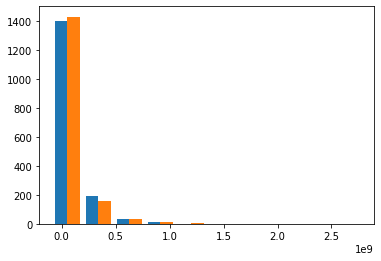

In [35]:
import matplotlib.pyplot as plt
plt.hist([predicted, y_test])

# Ajuste de modelos
* **Unferfitting (Subajuste)** Se presenta cuando un modelo no puede capturar la tendencia de los datos. Es generalmente el resultado de un modelo extremadamente simple.

* **Overfitting (Sobreajuste)** Se presenta cuando un algoritmo está perfectamente adaptado a los datos con los que lo entrenamos, pero si trataran de predecir nuevos datos, lo más probable es que nos de error.

Entre los modelos matemáticos que existen, el polinómico es el que mejor se adapta a tendencias de datos extrañas sin embargo, hay que tener cuidado de usar más del tercer orden polinómico.

# Evaluando el modelo

In [36]:
model.score(x_test, y_test)

0.8457345746583068

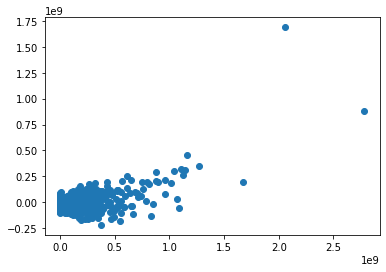

In [37]:
residuals = y_test - predicted

plt.scatter(y_test, residuals)

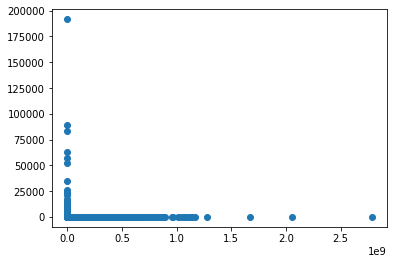

In [38]:
ap_residuals = np.abs(residuals) / y_test
plt.scatter(y_test, ap_residuals)

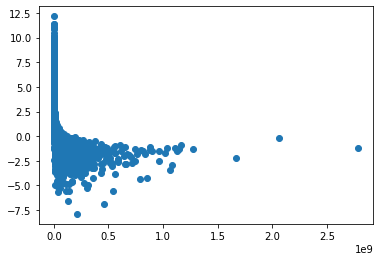

In [39]:
lap_residuals = np.log(ap_residuals)
plt.scatter(y_test, lap_residuals)

(array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 7.000e+00,
        9.000e+00, 1.000e+01, 1.200e+01, 1.700e+01, 2.300e+01, 2.500e+01,
        2.900e+01, 3.600e+01, 4.800e+01, 6.100e+01, 7.300e+01, 8.700e+01,
        1.040e+02, 1.250e+02, 1.610e+02, 1.960e+02, 2.430e+02, 3.030e+02,
        3.520e+02, 4.200e+02, 4.880e+02, 5.720e+02, 6.570e+02, 7.510e+02,
        8.340e+02, 9.040e+02, 9.760e+02, 1.031e+03, 1.079e+03, 1.115e+03,
        1.152e+03, 1.189e+03, 1.221e+03, 1.248e+03, 1.274e+03, 1.300e+03,
        1.313e+03, 1.324e+03, 1.345e+03, 1.362e+03, 1.376e+03, 1.389e+03,
        1.406e+03, 1.416e+03, 1.424e+03, 1.439e+03, 1.459e+03, 1.473e+03,
        1.482e+03, 1.490e+03, 1.503e+03, 1.517e+03, 1.533e+03, 1.538e+03,
        1.541e+03, 1.545e+03, 1.554e+03, 1.562e+03, 1.565e+03, 1.570e+03,
        1.577e+03, 1.583e+03, 1.585e+03, 1.592e+03, 1.597e+03, 1.599e+03,
        1.602e+03, 1.608e+03, 1.610e+0

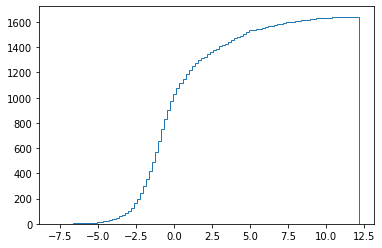

In [40]:
# Funcion acumulativa de la distribucion de los errores
plt.hist(lap_residuals, bins= 100, histtype='step', cumulative=True)

# Featuring Engneering
1. **Features informativas:** Tus feautures son mas utiles mientras mas correlacion tengan con tu variable objetivo.
2. **Features independientes:** Para no tener redundancia tus features deberian se lo mas independientes posibles entre ellas.
3. **Cantidad de features controladas:** Esto tiene que ver con la maldicion de la dimensionalidad. Aumentar la cantidad de features afecta negativamente el performance si no contamoscon una gran cantidad de datos.

Es importante conocer y entender la correlacion entre la feature y la variable objetivo.

In [47]:
import seaborn as sns
# x.corr() Nos permite obtener una matriz de correlacion, es decir ver la relacion entre las features
# Por logica la correlacion de la feature por si misma es 1
# Es señal de buena salud de nuestros datos que las features sean independientes, es decir tengan baja correlacion entre las demas features.

x.corr()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
production_budget,1.000000,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154,0.642562
title_year,0.207884,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685,0.014154
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765,0.030225
duration.1,0.276407,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642,0.238216
cast_total_facebook_likes,0.236820,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663,0.208941
budget,0.185357,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417,0.102666
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000,0.201331
gross,0.642562,0.014154,0.030225,0.238216,0.208941,0.102666,0.201331,1.000000


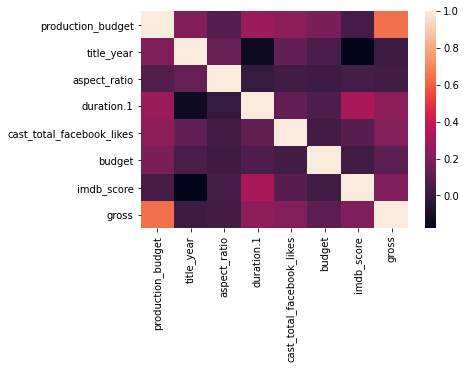

In [48]:
# Visualizando la correlacion de manera grafica con HEAT MAP
# Se observa que la correlacion se da de manera diagonal, es decir features independientes que son correlativas entre si
sns.heatmap(x.corr())

# Analisis Exploratorio

### Cheat Sheet de librerias importantes en ML
* Numpy: https://www.datacamp.com/community/blog/python-numpy-cheat-sheet#gs.AK5ZBgE
* Pandas: https://www.datacamp.com/community/blog/python-pandas-cheat-sheet#gs.oundfxM y https://www.datacamp.com/community/blog/pandas-cheat-sheet-python#gs.HPFoRIc
* Matplolib: https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet#gs.uEKySpY
* Scikit-Learn: https://www.datacamp.com/community/blog/scikit-learn-cheat-sheet
*Resumen más grande de Cheat Sheets: https://startupsventurecapital.com/essential-cheat-sheets-for-machine-learning-and-deep-learning-researchers-efb6a8ebd2e5

In [52]:
X = pd.read_csv('x.csv')

Y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [53]:
from sklearn.linear_model import Lasso
model = Lasso()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [54]:
len(X_train)/ len(X)

0.75

In [55]:
model.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
model.score(X_test, Y_test)

0.8519228954622595

In [60]:
var = np.floor(np.log10(np.abs(model.coef_)))

([<matplotlib.axis.XTick at 0x7f1471112cf8>,
 [Text(0, 0, 'production_budget'),
  Text(0, 0, 'title_year'),
  Text(0, 0, 'aspect_ratio'),
  Text(0, 0, 'duration.1'),
  Text(0, 0, 'cast_total_facebook_likes'),
  Text(0, 0, 'budget'),
  Text(0, 0, 'imdb_score')])

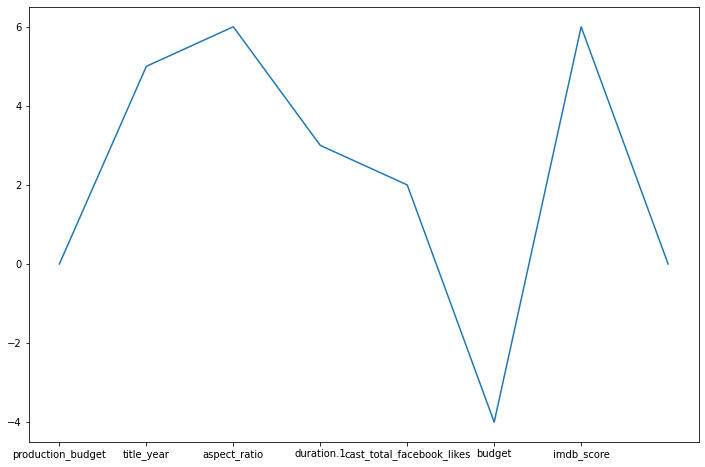

In [63]:
# Este grafico refleja que features son mas importantes y siendo asi se puede reducir las features, quedando las de mayor importancia para el modelo
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(var)
plt.xticks(np.arange(7), list(X.columns))

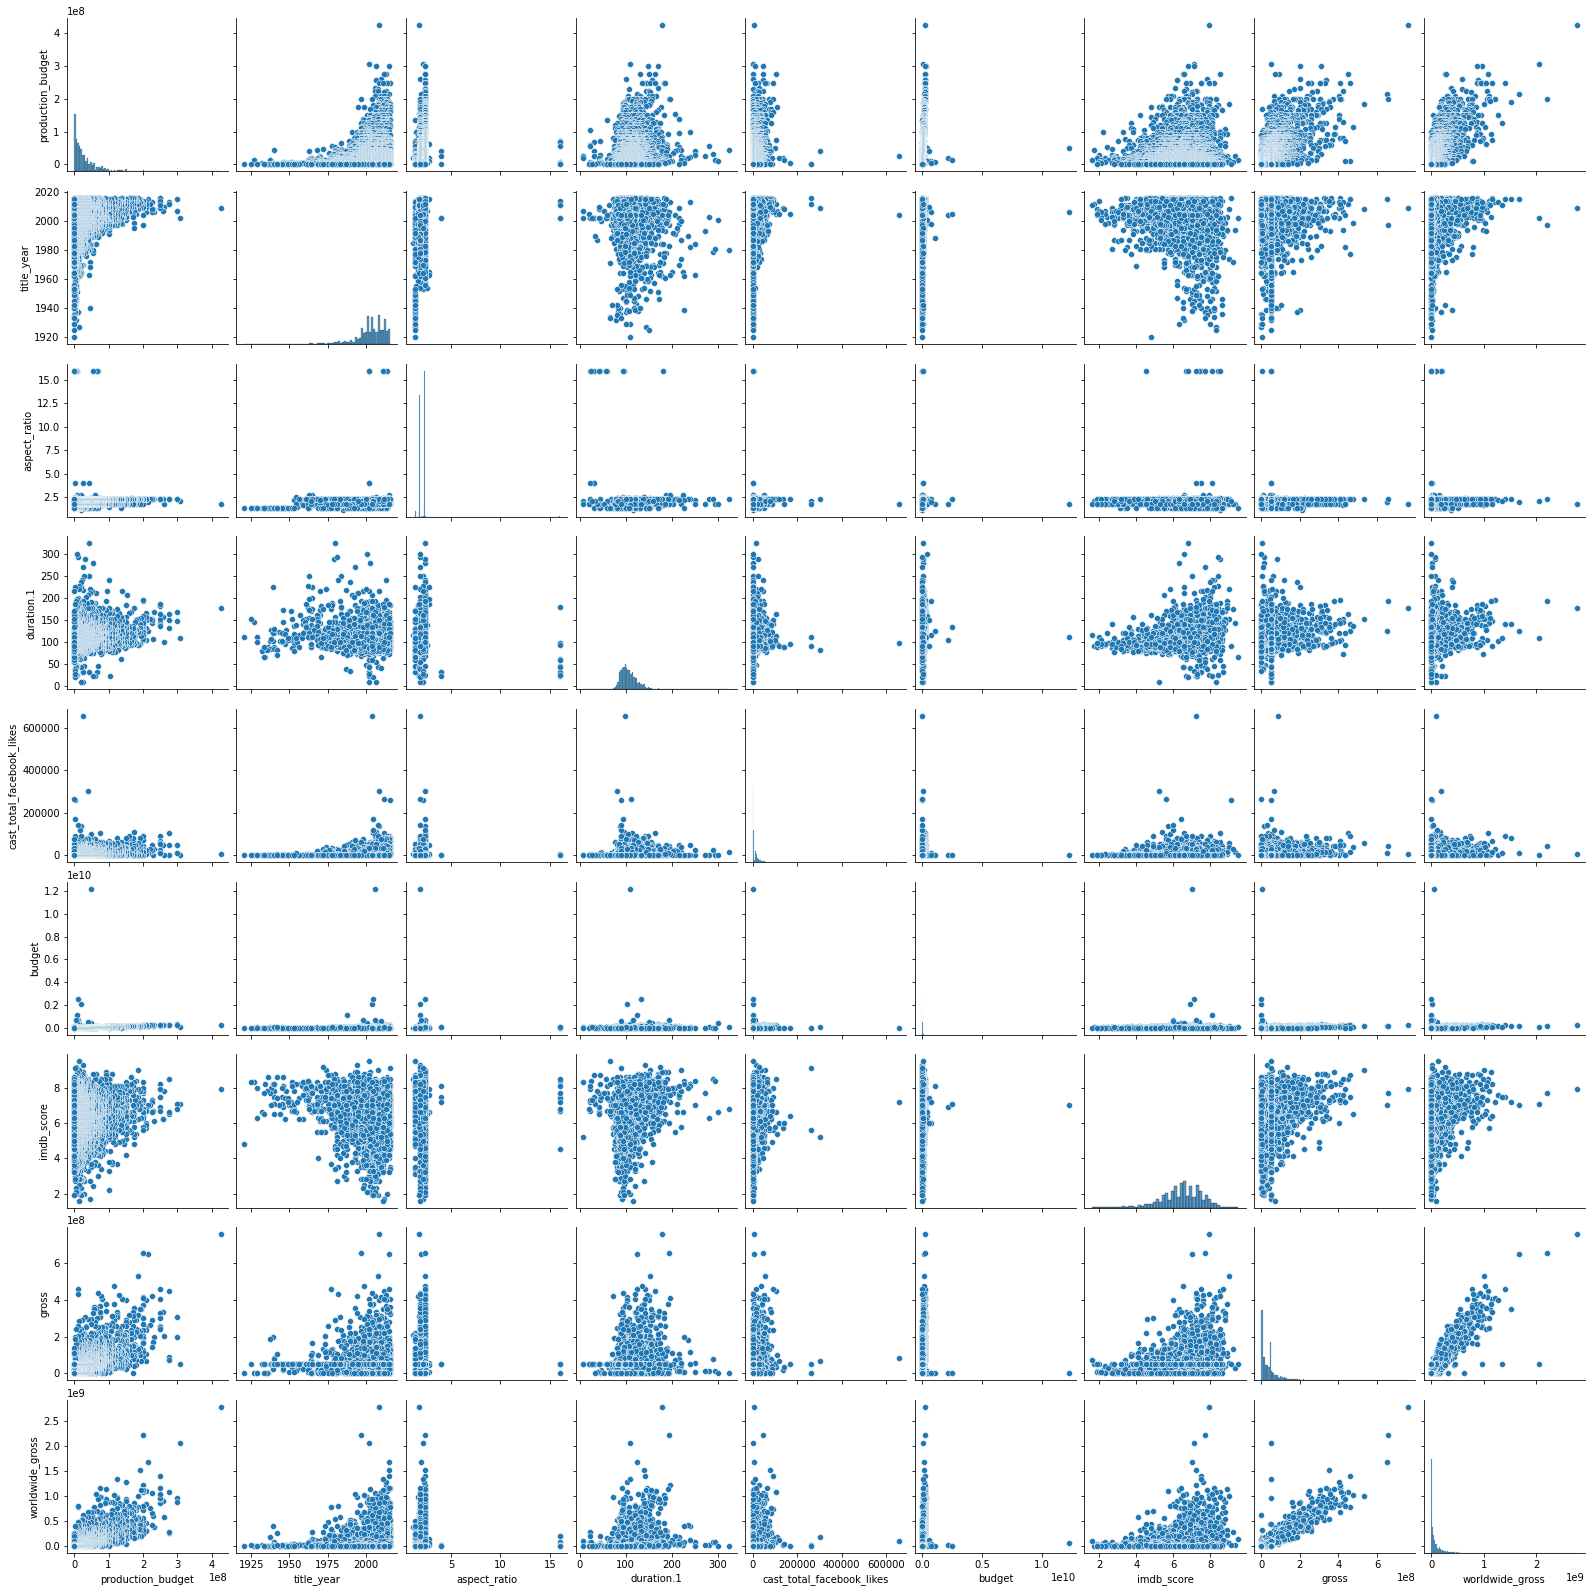

In [65]:
import seaborn as sns

Z = pd.concat([X, Y], axis=1)
sns.pairplot(Z)

In [77]:
clase = pd.cut(X['production_budget'], 8).cat.codes.rename('class')
Z2 = pd.concat([X, clase], axis= 1)
Z2.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,class
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,7
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07,5
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,5
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,5
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,5


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

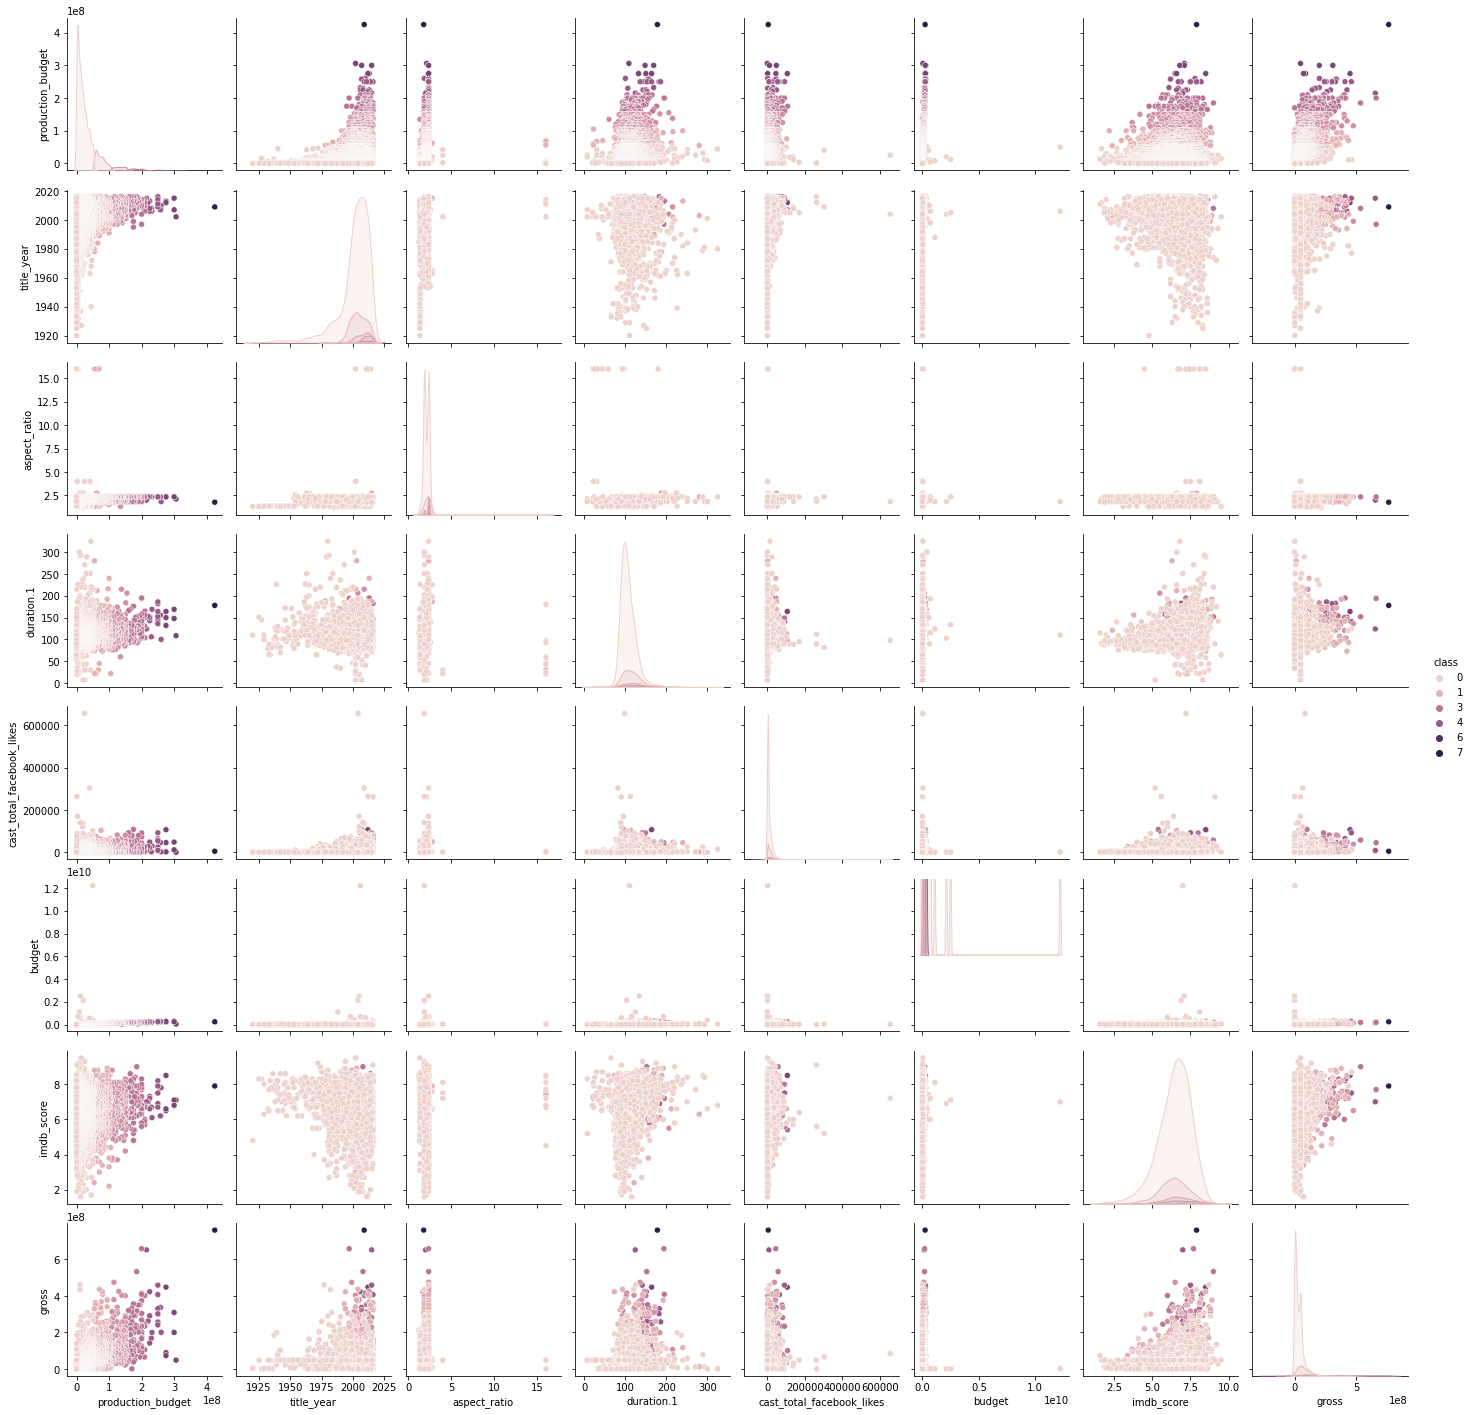

In [76]:
sns.pairplot(Z2, hue='class')

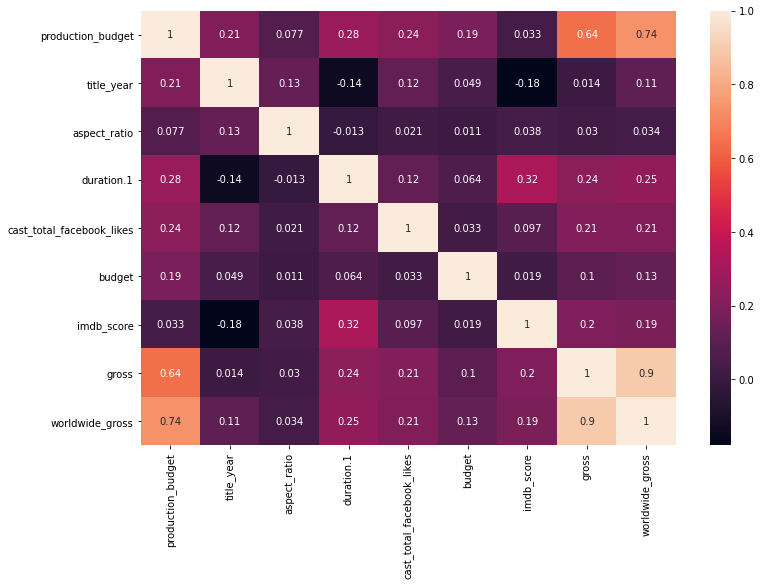

In [80]:
Z3 = pd.concat([X, Y], axis=1)
sns.heatmap(Z3.corr(), annot=True)

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X, Y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7f14679d8d90>)

([<matplotlib.axis.XTick at 0x7f14679814a8>,
 [Text(0, 0, 'production_budget'),
  Text(0, 0, 'title_year'),
  Text(0, 0, 'aspect_ratio'),
  Text(0, 0, 'duration.1'),
  Text(0, 0, 'cast_total_facebook_likes'),
  Text(0, 0, 'budget'),
  Text(0, 0, 'imdb_score')])

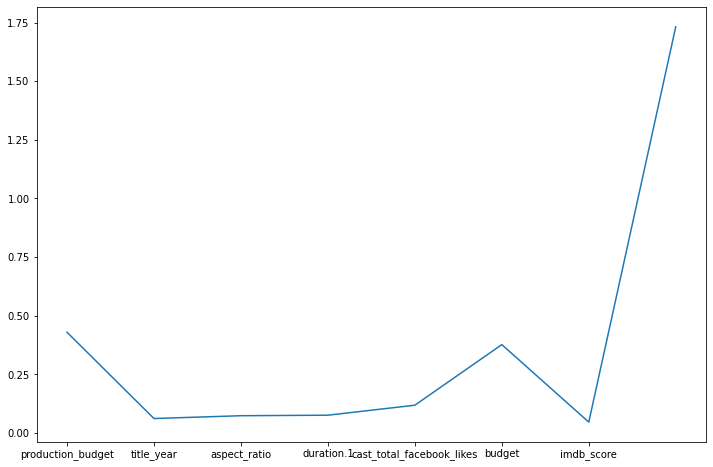

In [83]:
score = selector.scores_
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(score)
plt.xticks(np.arange(7), list(X.columns))

In [88]:
cols2 = ['production_budget', 'title_year', 'duration.1', 'cast_total_facebook_likes', 'imdb_score']
x2_train, x2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], Y_train, Y_test

cols3 = ['production_budget', 'cast_total_facebook_likes', 'imdb_score']
x3_train, x3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], Y_train, Y_test

In [89]:
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train, Y_train)
model2.fit(x2_train, y2_train)
model3.fit(x3_train, y3_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0759351889947812e+19, tolerance: 9151537965386476.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
print(model1.score(X_test, Y_test))
print(model2.score(x2_test, y2_test))
print(model3.score(x3_test, y3_test))

0.8519228954622595
0.5540441895341724
0.555829698342809


# Modelos y evaluacion mas avanzada